# MNIST - Categorical Classification
> # Overfitting Issue
## Import TensorFlow

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow

In [ ]:
import tensorflow as tf

tf.__version__

'2.15.0'

* GPU 설정 확인

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


* GPU 종류 확인

In [ ]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11236762178750034772
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1335234712182810091
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
!nvidia-smi

Mon Apr  8 06:25:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0              27W /  70W |    103MiB / 15360MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# I. MNIST Data_Set Load & Review

> ## 1) Load MNIST Data_Set

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


* Train_Data Information

In [3]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)

60000
[5 0 4 1 9]


* Test_Data Information

In [4]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)

10000
[7 2 1 0 4]


> ## 2) Visualization

* matplotlib

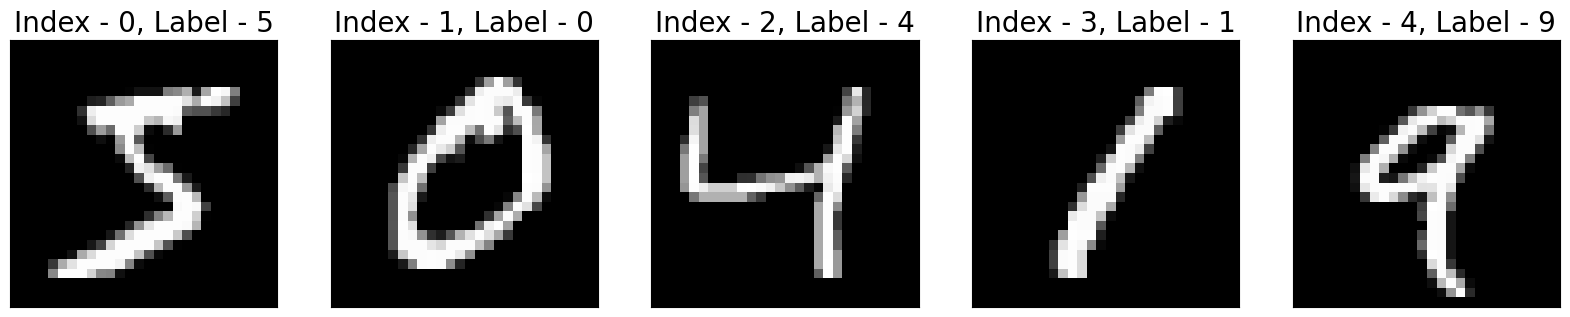

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 4))
for idx in range(5):
    label = y_train[idx]
    plt.subplot(1, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx], cmap = 'gray')
    plt.title('Index - %d, Label - %d' % (idx, label), fontsize = 20)
plt.show()

* NumPy Array

In [6]:
import numpy as np
np.set_printoptions(linewidth = 150, precision = 2)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# II. Data Preprocessing

> ## 1) Normalization

* 범위: 0 ~ 1

In [7]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
#정규화 normalization

In [8]:
print(X_train[4])

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

> ## 2) Reshape

 * (60000, 28, 28) to (60000, 784)

In [9]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

> ## 3) One Hot Encoding

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


> ## 4) train_test_split( )

* Train(48,000) vs. Validation(12,000)

In [ ]:
train_test_split?

Object `train_test_split` not found.


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((48000, 784), (48000, 10), (12000, 784), (12000, 10))

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes
 - 복잡한 Model Capacity로 인한 Overfitting

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,))) #가독성을 위해 *형태로도 나타냄
mnist.add(layers.Dense(256, activation = 'relu')) # 오버피팅 유도
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [14]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [15]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 4분

In [ ]:
mnist.fit?

In [16]:
# %%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_split = 0.2)
                    #    validation_data = (X_valid, y_valid))

Epoch 1/50
300/300 [==============================] - 4s 6ms/step - loss: 0.2753 - accuracy: 0.9197 - val_loss: 0.1380 - val_accuracy: 0.9595
Epoch 2/50
300/300 [==============================] - 1s 5ms/step - loss: 0.1012 - accuracy: 0.9693 - val_loss: 0.1087 - val_accuracy: 0.9661
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0612 - accuracy: 0.9808 - val_loss: 0.0998 - val_accuracy: 0.9700
Epoch 4/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0886 - val_accuracy: 0.9742
Epoch 5/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0905 - val_accuracy: 0.9740
Epoch 6/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.1009 - val_accuracy: 0.9730
Epoch 7/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0946 - val_accuracy: 0.9756
Epoch 

> ## 4) 학습 결과 시각화 - Overfitting

* Loss Visualization

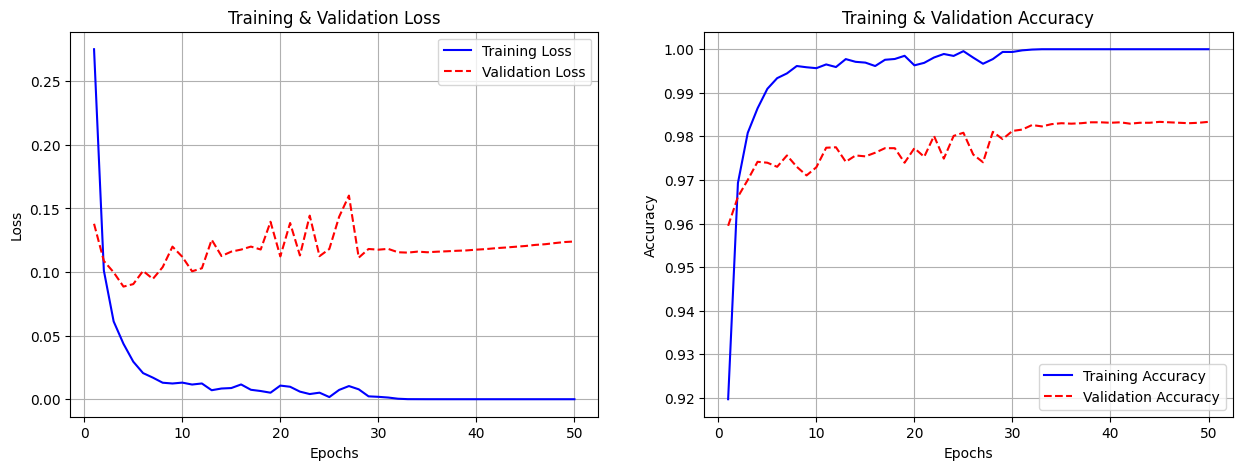

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [18]:
loss, accuracy = mnist.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.11824
Accuracy = 0.98330


> ## 6) Model Predict

* Probability

In [19]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1,:], verbose = 0))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


* Class

In [20]:
print(np.argmax(mnist.predict(X_test[:1,:], verbose = 0)))

7


> ## 7) Image Visualization

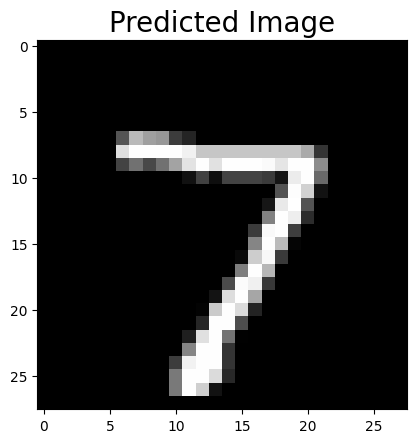

In [21]:
plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray')
plt.title('Predicted Image', fontsize = 20)
plt.show()

> ## 8) Confusion Matrix

In [22]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
np.argmax(y_test, axis = 1)

array([7, 2, 1, ..., 4, 5, 6])

In [24]:
mnist.predict(X_test, verbose = 0)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)

array([7, 2, 1, ..., 4, 5, 6])

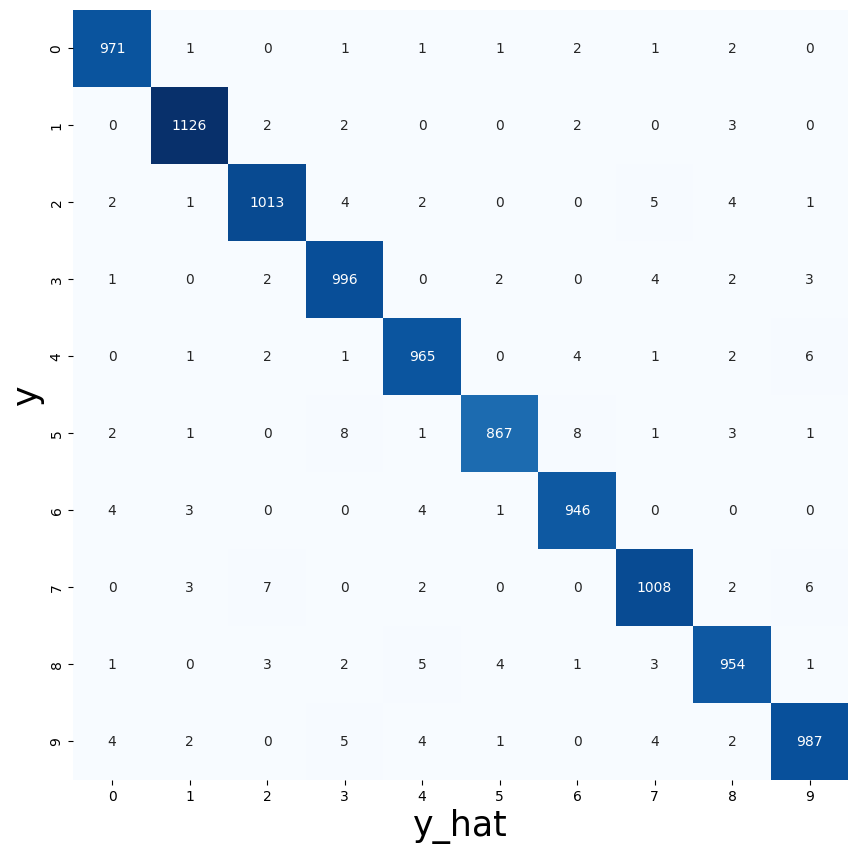

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

CM = confusion_matrix(np.argmax(y_test, axis = 1), # y true
                      np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)) # y pred

plt.figure(figsize = (10, 10))
sns.heatmap(CM,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            cbar = False)
plt.xlabel('y_hat', fontsize = 25)
plt.ylabel('y', fontsize = 25)
plt.show()

> ## 9) Classification Report

In [27]:
from sklearn.metrics import classification_report

print('\n',
      classification_report(np.argmax(y_test, axis = 1),
                            np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)))


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# 1)  model capacity 줄이기

In [28]:
mnist1 = models.Sequential()
mnist1.add(layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
mnist1.add(layers.Dense(10, activation = 'softmax'))

In [29]:
mnist1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
mnist1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [49]:
# %%time

Hist_mnist1 = mnist1.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 1.1195e-04 - accuracy: 1.0000 - val_loss: 0.1156 - val_accuracy: 0.9806
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 9.7540e-05 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 0.9807
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 8.6590e-05 - accuracy: 1.0000 - val_loss: 0.1168 - val_accuracy: 0.9807
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 7.6796e-05 - accuracy: 1.0000 - val_loss: 0.1178 - val_accuracy: 0.9809
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 6.7894e-05 - accuracy: 1.0000 - val_loss: 0.1184 - val_accuracy: 0.9806
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 6.0814e-05 - accuracy: 1.0000 - val_loss: 0.1187 - val_accuracy: 0.9809
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 5.3872e-05 - accuracy: 1.0000 - val_loss: 0

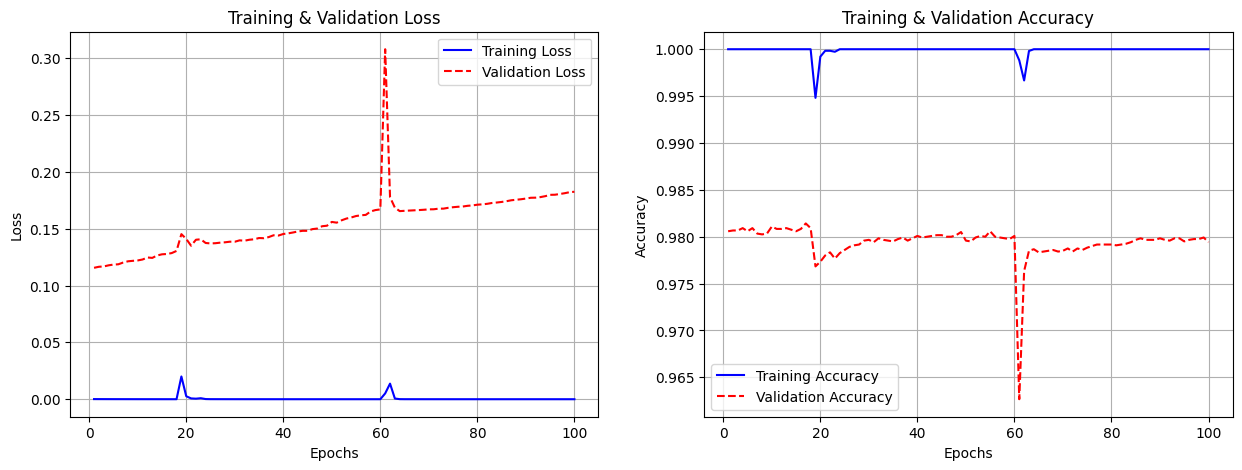

In [50]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist1.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist1.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist1.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist1.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist1.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization
- https://wooono.tistory.com/221
- L1 Regularization 의 개념에서 가장 중요한 것은 cost function 에 가중치의 절대값을 더해준다는 것
- 기존의 cost function 에 가중치의 제곱을 더함으로써 가중치가 너무 크지 않은 방향으로 학습되게 됩니다.
L1 Loss, L2 Loss 의 차이
L2 Loss 는 직관적으로 오차의 제곱을 더하기 때문에 Outlier 에 더 큰 영향을 받습니다.
"L1 Loss 가 L2 Loss 에 비해 Outlier 에 대하여 더 Robust(덜 민감 혹은 둔감) 하다." 라고 표현 할 수 있습니다.
Outlier 가 적당히 무시되길 원한다면 L1 Loss 를 사용하고
Outlier 의 등장에 신경써야 하는 경우라면 L2 Loss 를 사용하는 것이 좋겠습니다.
L1 Loss 는 0인 지점에서 미분이 불가능하다는 단점 또한 가지고 있습니다.

L1 Regularization, L2 Regularization 의 차이와 선택 기준
L1 Regularization은 가중치 업데이트 시, 가중치의 크기에 상관 없이 상수값을 빼면서 진행됩니다.

때문에 작은 가중치들은 거의 0으로 수렴 되어, 몇개의 중요한 가중치들만 남게 됩니다.

그러므로 몇 개의 의미 있는 값을 끄집어내고 싶은 sparse model 같은 경우에는 L1 Regularization이 효과적입니다.

다만, L1 Regularization은 아래 그림처럼 미분 불가능한 점이 있기 때문에 Gradient-base learning 에는 주의가 필요합니다.


L2 Regularization은 가중치 업데이트 시, 가중치의 크기가 직접적인 영향을 미칩니다.

따라서, L2는 L1 보다 가중치 규제에 좀 더 효과적입니다.

In [ ]:
layers.Dense?

In [33]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R = models.Sequential()
mnist_L2R.add(layers.Dense(512, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001), # l2 기본값 0.01
                       input_shape = (28 * 28,)))
mnist_L2R.add(layers.Dense(256, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R.add(layers.Dense(10, activation = 'softmax'))

In [34]:
mnist_L2R.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
mnist_L2R.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [36]:
# %%time

mnist_L2R_H = mnist_L2R.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.2631 - accuracy: 0.9253 - val_loss: 0.1402 - val_accuracy: 0.9627
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.1010 - accuracy: 0.9720 - val_loss: 0.1127 - val_accuracy: 0.9687
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0711 - accuracy: 0.9811 - val_loss: 0.1105 - val_accuracy: 0.9718
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0513 - accuracy: 0.9875 - val_loss: 0.0936 - val_accuracy: 0.9767
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0415 - accuracy: 0.9909 - val_loss: 0.0995 - val_accuracy: 0.9762
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0376 - accuracy: 0.9919 - val_loss: 0.0931 - val_accuracy: 0.9762
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0304 - accuracy: 0.9946 - val_loss: 0.1010 - val_accuracy: 0.9762

==== L2 Regularization ====


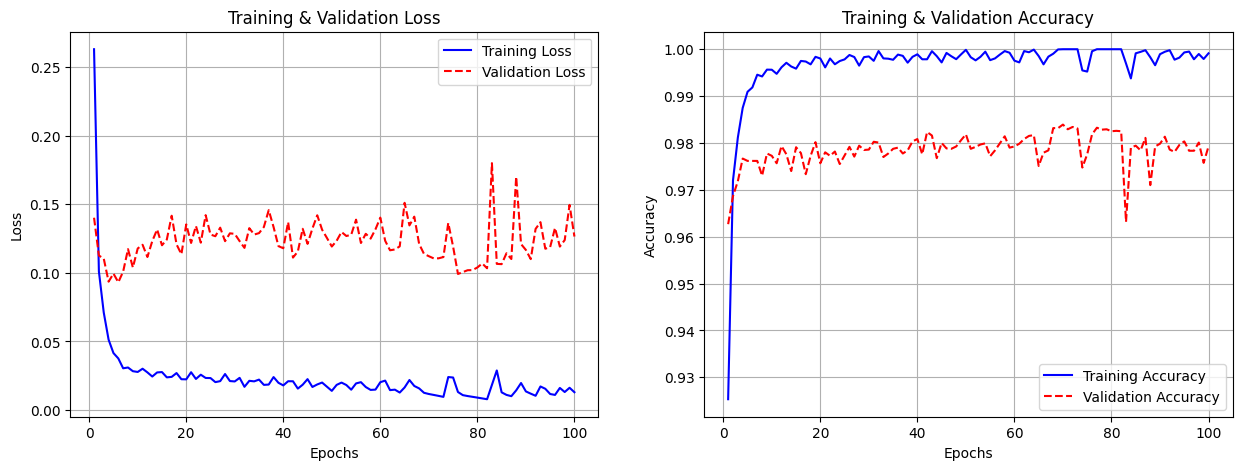

In [37]:
import matplotlib.pyplot as plt
print('==== L2 Regularization ====')

epochs = range(1, len(mnist_L2R_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_L2R_H.history['loss'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_L2R_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Drop out

In [38]:

mnist_D = models.Sequential()
mnist_D.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist_D.add(layers.Dropout(0.4))
mnist_D.add(layers.Dense(256, activation = 'relu'))
mnist_D.add(layers.Dropout(0.2))
mnist_D.add(layers.Dense(10, activation = 'softmax'))

In [39]:
mnist_D.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
mnist_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [41]:
# %%time
mnist_D_H = mnist_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 4s 5ms/step - loss: 0.3285 - accuracy: 0.8999 - val_loss: 0.1495 - val_accuracy: 0.9525
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.1452 - accuracy: 0.9556 - val_loss: 0.1113 - val_accuracy: 0.9670
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1054 - accuracy: 0.9679 - val_loss: 0.1030 - val_accuracy: 0.9695
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0886 - accuracy: 0.9716 - val_loss: 0.0886 - val_accuracy: 0.9744
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0725 - accuracy: 0.9769 - val_loss: 0.0832 - val_accuracy: 0.9757
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0625 - accuracy: 0.9802 - val_loss: 0.0815 - val_accuracy: 0.9769
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0588 - accuracy: 0.9814 - val_loss: 0.0791 - val_accuracy: 0.9770

==== Drop Out ====


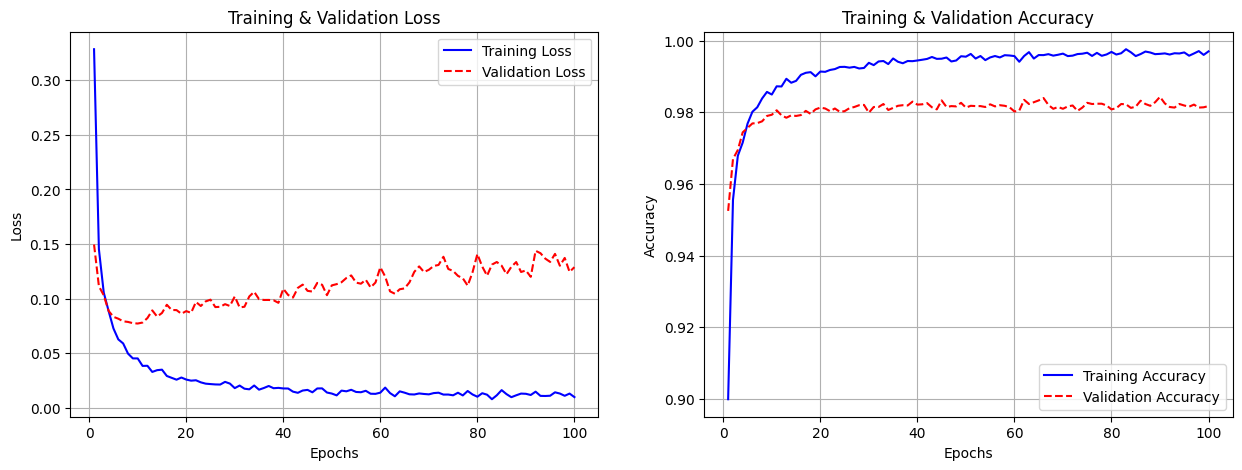

In [42]:
import matplotlib.pyplot as plt
print('==== Drop Out ====')

epochs = range(1, len(mnist_D_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_D_H.history['loss'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_D_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Batch Normalization

In [43]:
mnist_BN = models.Sequential()
mnist_BN.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist_BN.add(layers.BatchNormalization())
mnist_BN.add(layers.Activation('relu'))
mnist_BN.add(layers.Dense(256 ))
mnist_BN.add(layers.BatchNormalization())
mnist_BN.add(layers.Activation('relu'))
mnist_BN.add(layers.Dense(10, activation = 'softmax'))

In [44]:
mnist_BN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 256)              

In [45]:
mnist_BN.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [46]:
# %%time

mnist_BN_H = mnist_BN.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 5s 6ms/step - loss: 0.1863 - accuracy: 0.9447 - val_loss: 0.1234 - val_accuracy: 0.9638
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0710 - accuracy: 0.9792 - val_loss: 0.0996 - val_accuracy: 0.9706
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0431 - accuracy: 0.9868 - val_loss: 0.0872 - val_accuracy: 0.9746
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0280 - accuracy: 0.9925 - val_loss: 0.0850 - val_accuracy: 0.9756
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.0870 - val_accuracy: 0.9761
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0905 - val_accuracy: 0.9755
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.0978 - val_accuracy: 0.9736

==== Batch Normalization ====


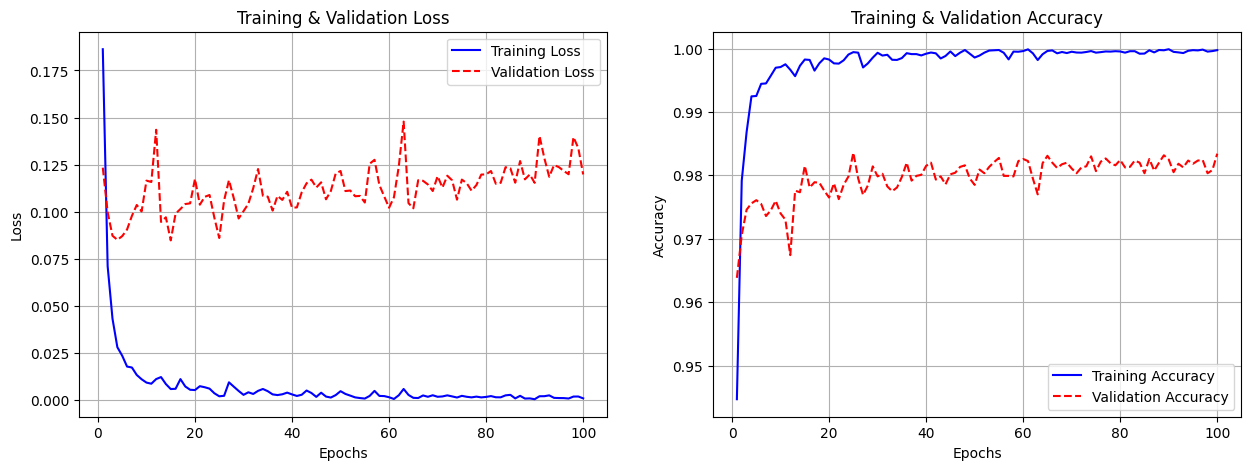

In [47]:
import matplotlib.pyplot as plt
print('==== Batch Normalization ====')

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_BN_H.history['loss'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_BN_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# loss 결과 비교

ValueError: x and y must have same first dimension, but have shapes (100,) and (50,)

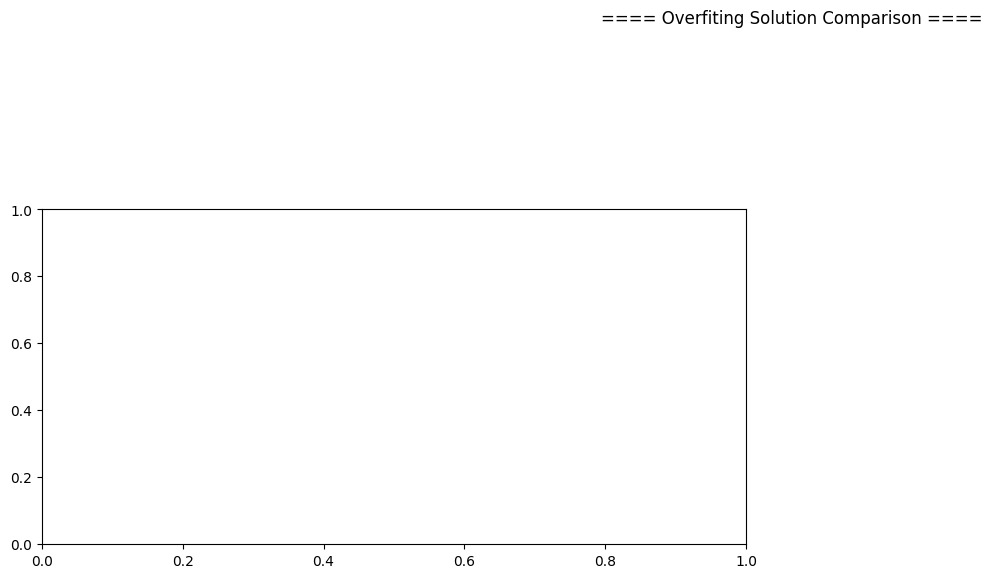

In [51]:
import matplotlib.pyplot as plt

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Overfiting Solution Comparison ====')


plt.subplot(4, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Model Capacity - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Model Capacity - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()


plt.subplot(4, 2, 3)
plt.plot(epochs, mnist_L2R_H.history['loss'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_loss'], 'r--')
plt.title('L2 Regularization - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 4)
plt.plot(epochs, mnist_L2R_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_accuracy'], 'r--')
plt.title('L2 Regularization - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()


plt.subplot(4, 2, 5)
plt.plot(epochs, mnist_D_H.history['loss'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_loss'], 'r--')
plt.title('Drop Out - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 6)
plt.plot(epochs, mnist_D_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_accuracy'], 'r--')
plt.title('Drop Out - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()



plt.subplot(4, 2, 7)
plt.plot(epochs, mnist_BN_H.history['loss'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_loss'], 'r--')
plt.title('Batch Normalization - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 8)
plt.plot(epochs, mnist_BN_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_accuracy'], 'r--')
plt.title('Batch Normalization - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Batch Normalization & Drop out

In [52]:
mnist_BN_D = models.Sequential()

mnist_BN_D.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist_BN_D.add(layers.BatchNormalization())
mnist_BN_D.add(layers.Activation('relu'))
mnist_BN_D.add(layers.Dropout(0.4))

mnist_BN_D.add(layers.Dense(256 ))
mnist_BN_D.add(layers.BatchNormalization())
mnist_BN_D.add(layers.Activation('relu'))
mnist_BN_D.add(layers.Dropout(0.4))
mnist_BN_D.add(layers.Dense(10, activation = 'softmax'))

In [53]:
mnist_BN_D.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                     

In [54]:
mnist_BN_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [55]:
# %%time

mnist_BN_D_H = mnist_BN_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 5s 7ms/step - loss: 0.3420 - accuracy: 0.8952 - val_loss: 0.1497 - val_accuracy: 0.9565
Epoch 2/100
375/375 [==============================] - 2s 7ms/step - loss: 0.1669 - accuracy: 0.9483 - val_loss: 0.1142 - val_accuracy: 0.9656
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1269 - accuracy: 0.9599 - val_loss: 0.1027 - val_accuracy: 0.9692
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1049 - accuracy: 0.9672 - val_loss: 0.0878 - val_accuracy: 0.9743
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0969 - accuracy: 0.9696 - val_loss: 0.0900 - val_accuracy: 0.9733
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0807 - accuracy: 0.9736 - val_loss: 0.0865 - val_accuracy: 0.9757
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0739 - accuracy: 0.9760 - val_loss: 0.0808 - val_accuracy: 0.9768

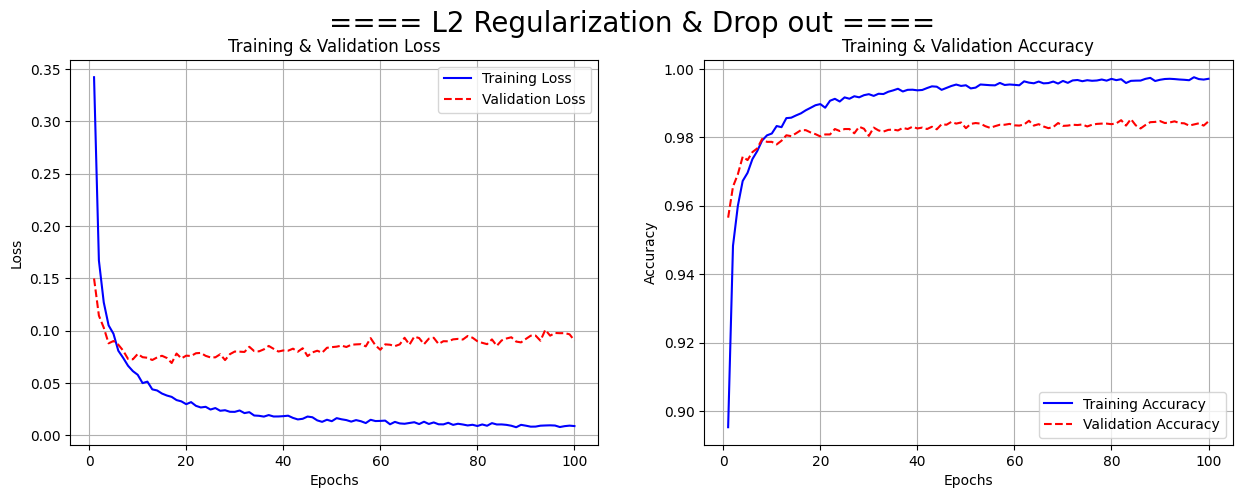

In [58]:
import matplotlib.pyplot as plt

epochs = range(1, len(mnist_BN_D_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_BN_D_H.history['loss'], 'b-')
plt.plot(epochs, mnist_BN_D_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_BN_D_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_BN_D_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization & Drop out

In [59]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_D = models.Sequential()
mnist_L2R_D.add(layers.Dense(512, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_D.add(layers.Dropout(0.4))
mnist_L2R_D.add(layers.Dense(256, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_D.add(layers.Dropout(0.2))
mnist_L2R_D.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_L2R_D.summary()

In [ ]:
mnist_L2R_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
# %%time

mnist_L2R_D_H = mnist_L2R_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

In [ ]:
import matplotlib.pyplot as plt


epochs = range(1, len(history_model.history['loss']) + 1)
history_model = mnist_BN_D_H
plt.figure(figsize = (15, 5))
plt.suptitle('==== Batch Normalization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization & Batch Normalization

In [ ]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_BN = models.Sequential()
mnist_L2R_BN.add(layers.Dense(512,
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_BN.add(layers.BatchNormalization())
mnist_L2R_BN.add(layers.Activation('relu'))


mnist_L2R_BN.add(layers.Dense(256,
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_BN.add(layers.BatchNormalization())
mnist_L2R_BN.add(layers.Activation('relu'))

mnist_L2R_BN.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_L2R_BN.summary()

In [ ]:
mnist_L2R_BN.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
# %%time

mnist_L2R_BN_H = mnist_L2R_BN.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

In [ ]:
import matplotlib.pyplot as plt


epochs = range(1, len(history_model.history['loss']) + 1)
history_model = mnist_L2R_BN_H
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Batch Normalization ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization & Batch Normalization & Drop out

In [ ]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_BN_D = models.Sequential()
mnist_L2R_BN_D.add(layers.Dense(512,
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_BN_D.add(layers.BatchNormalization())
mnist_L2R_BN_D.add(layers.Activation('relu'))
mnist_L2R_BN_D.add(layers.Dropout(0.4))

mnist_L2R_BN_D.add(layers.Dense(256,
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_BN_D.add(layers.BatchNormalization())
mnist_L2R_BN_D.add(layers.Activation('relu'))
mnist_L2R_BN_D.add(layers.Dropout(0.2))

mnist_L2R_BN_D.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_L2R_BN_D.summary()

In [ ]:
mnist_L2R_BN_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
# %%time

mnist_L2R_BN_D_H = mnist_L2R_BN_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

In [ ]:
import matplotlib.pyplot as plt


epochs = range(1, len(history_model.history['loss']) + 1)
history_model = mnist_L2R_BN_D_H
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Batch Normalization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# 조합 loss 결과 비교

In [ ]:
model_h_list = ['mnist_L2R_BN_H', 'mnist_L2R_D_H', 'mnist_BN_D_H', 'mnist_L2R_BN_D_H']
model_h_vlist = [mnist_L2R_BN_H, mnist_L2R_D_H, mnist_BN_D_H, mnist_L2R_BN_D_H]

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Overfiting Solution Comparison ====', fontsize=20)


for i in range(len(model_h_list)):
    plt.subplot(len(model_h_list), int(len(model_h_list)/2), i+1)
    plt.plot(epochs, model_h_vlist[i].history['loss'], 'b-')
    plt.plot(epochs, model_h_vlist[i].history['val_loss'], 'r--')
    plt.title(f'{model_h_list[i]} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.grid()

plt.show()

# The End